In [2]:
library(tidyverse)
library(tidymodels)
library(dplyr)
library(repr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
url <- "https://raw.githubusercontent.com/dzhen2023/dsci-100-2024w1-group-009-12/refs/heads/main/players.csv"
url2 <- "https://raw.githubusercontent.com/dzhen2023/dsci-100-2024w1-group-009-12/refs/heads/main/sessions.csv"
download.file(url2, "sessions.csv")
download.file(url, "players.csv") 

player_data <- read_csv("players.csv") 
session_data <- read_csv("sessions.csv")

experience_data <- player_data |>
    mutate(experience_scaled = case_when(
        experience == "Veteran" ~ 5,
        experience == "Pro" ~ 4,
        experience == "Regular" ~ 3,
        experience == "Amateur" ~ 2,
        experience == "Beginner" ~ 1,
        TRUE ~ NA_real_)) |> 
    # filter(played_hours != "0") |>
    select(experience_scaled, everything()) #so the new numbers are beside the original column


set.seed(411) #set before each thingy

player_split <- initial_split(experience_data, prop = 0.75)
player_training <- training(player_split)
player_testing <- testing(player_split)

# session_split <- initial_split(session_data, prop = 0.75)
# session_training <- training(session_split)
# session_testing <- testing(session_split)


head(player_training, n = 20)
# head(session_training, n = 20)


# i need to do a linear model with experience scaled from 1-5
# shouldn't need session data for this but will have it on hand just in case

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience_scaled,experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<dbl>,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
2,Amateur,TRUE,25879aecc205544bc6505f9faf768356e0a3b7126057308ae3235f8a514e9a62,0.0,Eli,Female,17,NA,NA
5,Veteran,TRUE,702309b8b646235edbc6025d3d3b9673f502b3d3a05df5cf3890893e559a2d88,0.0,Soren,Male,20,NA,NA
5,Veteran,TRUE,9a559f381d4c432cd528992b9c31f624b5b7074f642328c29d16fd2277bd1cc2,0.0,Kazuki,Male,21,NA,NA
3,Regular,TRUE,65c53ff7acdd69fd42b2a3b04e44870ea12b55b93a7ea1d6855c21a861b5a373,0.0,Juniper,Non-binary,22,NA,NA
2,Amateur,TRUE,fc0224c81384770e93ca717f32713960144bf0b52ff67639433a5c06a653a882,0.2,Gemna,Male,27,NA,NA
2,Amateur,TRUE,710148466b44cb02ba894aa9005a4892e619250ebd01153055d6c7578fc1ea10,0.1,Ayman,Male,23,NA,NA
2,Amateur,TRUE,dbb20960cd4db4900dde7832e349dae46f7688583c8138b34785d9c7e509b5b9,0.0,Jia,Female,26,NA,NA
5,Veteran,TRUE,b3510c708bd50bf9f75e6e02bb6fe14edb705e0ea671ee769a45c613750e8b58,12.5,Isidore,Agender,27,NA,NA
2,Amateur,FALSE,200db0417ee70863c7e2a0f214c737476fb86de5869d0b907a077d726357e687,0.1,Anastasia,Female,17,NA,NA


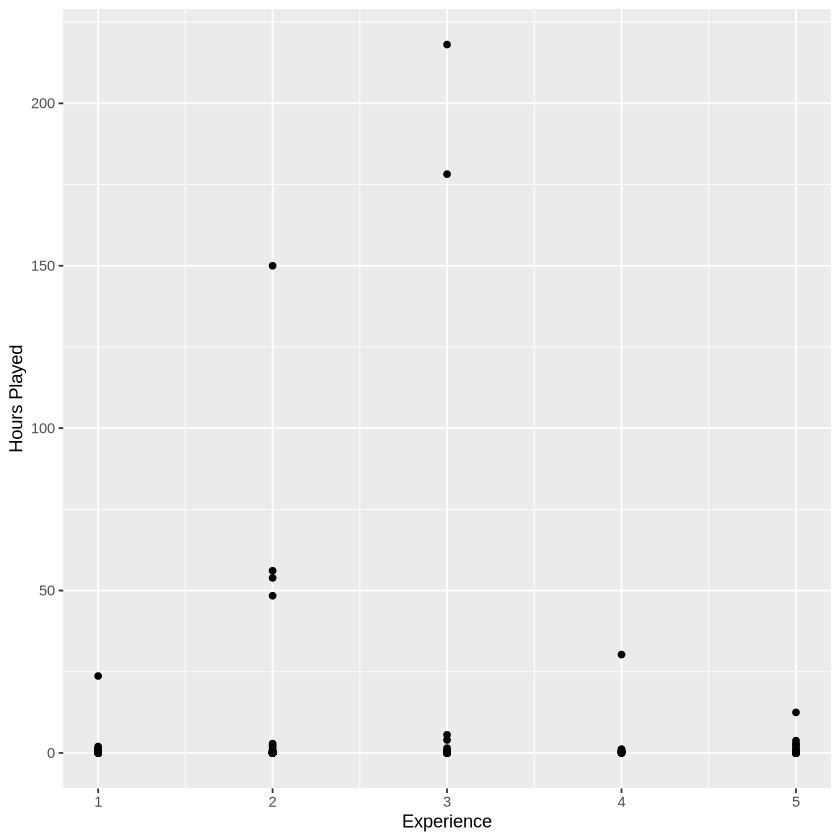

In [7]:
set.seed(411)

plotting <- ggplot(player_training, aes(x = experience_scaled, y = played_hours)) +
    geom_point() +
    labs(x = "Experience", y = "Hours Played")

plotting #not really a linear scale. don't think this is the way to go

In [8]:
set.seed(411)

lm_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

lm_recipe <- recipe(played_hours ~ experience_scaled, data = player_training)

lm_fit <- workflow() |>
    add_recipe(lm_recipe) |>
    add_model(lm_spec) |>
    fit(data = player_training)

lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
      (Intercept)  experience_scaled  
           7.7011            -0.7134  


In [9]:
set.seed(411)

training_preds <- lm_fit |>
    predict(player_training) |>
    bind_cols(player_training)

head(training_preds, n=10)

.pred,experience_scaled,experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<dbl>,<dbl>,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
6.274237,2,Amateur,TRUE,25879aecc205544bc6505f9faf768356e0a3b7126057308ae3235f8a514e9a62,0.0,Eli,Female,17,NA,NA
4.133951,5,Veteran,TRUE,702309b8b646235edbc6025d3d3b9673f502b3d3a05df5cf3890893e559a2d88,0.0,Soren,Male,20,NA,NA
4.133951,5,Veteran,TRUE,9a559f381d4c432cd528992b9c31f624b5b7074f642328c29d16fd2277bd1cc2,0.0,Kazuki,Male,21,NA,NA
5.560809,3,Regular,TRUE,65c53ff7acdd69fd42b2a3b04e44870ea12b55b93a7ea1d6855c21a861b5a373,0.0,Juniper,Non-binary,22,NA,NA
6.274237,2,Amateur,TRUE,fc0224c81384770e93ca717f32713960144bf0b52ff67639433a5c06a653a882,0.2,Gemna,Male,27,NA,NA
6.274237,2,Amateur,TRUE,710148466b44cb02ba894aa9005a4892e619250ebd01153055d6c7578fc1ea10,0.1,Ayman,Male,23,NA,NA
6.274237,2,Amateur,TRUE,dbb20960cd4db4900dde7832e349dae46f7688583c8138b34785d9c7e509b5b9,0.0,Jia,Female,26,NA,NA
4.133951,5,Veteran,TRUE,b3510c708bd50bf9f75e6e02bb6fe14edb705e0ea671ee769a45c613750e8b58,12.5,Isidore,Agender,27,NA,NA
6.274237,2,Amateur,FALSE,200db0417ee70863c7e2a0f214c737476fb86de5869d0b907a077d726357e687,0.1,Anastasia,Female,17,NA,NA


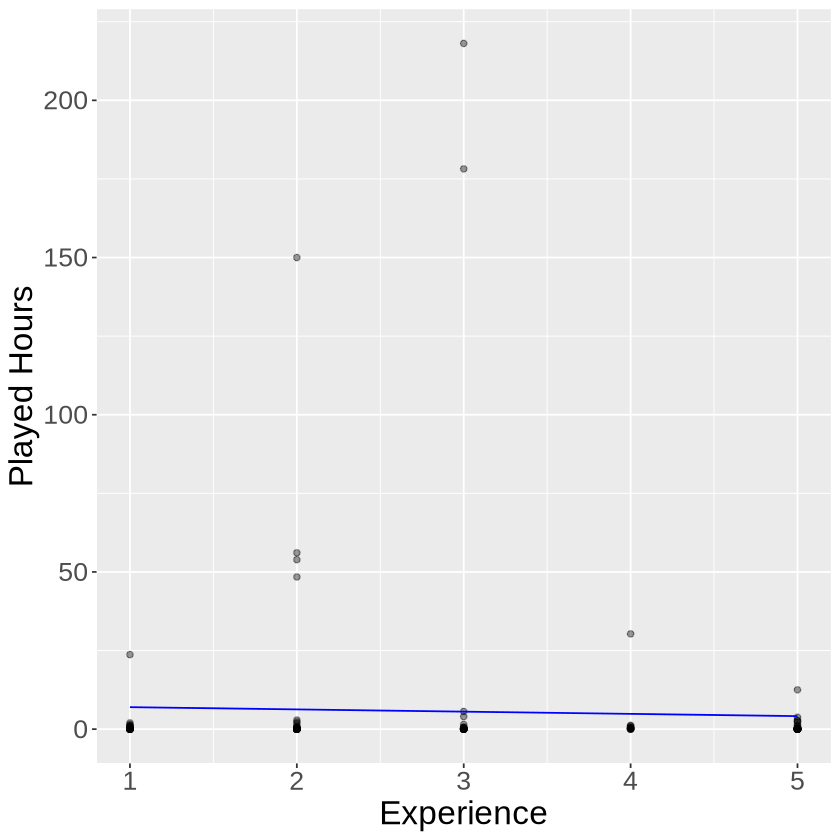

In [10]:
set.seed(411)

lm_predictions <- training_preds |>
    ggplot(aes(x = experience_scaled, y = played_hours)) +
        geom_point(alpha = 0.4) +
        geom_line(
            mapping = aes(x = experience_scaled, y = .pred), 
            color = "blue") +
        xlab("Experience") +
        ylab("Played Hours") +
        theme(text = element_text(size = 20))
lm_predictions

In [11]:
set.seed(411)

testing_results <- lm_fit |>
    predict(player_testing) |>
    bind_cols(player_testing) |>
    metrics(truth = played_hours, estimate = .pred) 

testing_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.178883e+01
rsq,standard,1.437197e-06
mae,standard,1.010228e+01


In [12]:
set.seed(411)

coeffs <- lm_fit |>
             extract_fit_parsnip() |>
             tidy()

coeffs

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),7.7010944,4.988471,1.5437785,0.1248217
experience_scaled,-0.7134286,1.526914,-0.4672355,0.6410327


In [17]:
# i think this is not the right type of model because:
#a) there are a lot of zeros for our predicted values
#b) most of the data for hours played is in the decimals so the outliers are huge
    #so it isn't really helpful
#c) the data isn't linear so linear regression won't work
# knn seems like a better option unless someone has another idea to make the data less
    #clumped in terms of hours played